## Importing the required libraries

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

## Displaying our image

Size(dimension):  (640, 321)


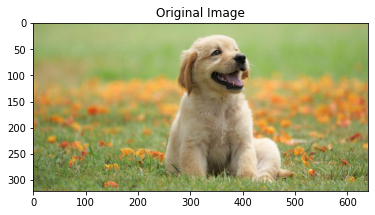

In [ ]:
path = 'dog.jpg'
img = Image.open(path)
print("Size(dimension): ",img.size)
plt.title("Original Image")
plt.imshow(img)

## Converting to grayscale

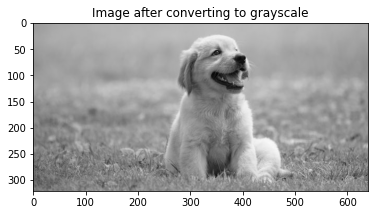

In [ ]:
img_grayscale = img.convert('LA')
plt.title("Image after converting to grayscale")
plt.imshow(img_grayscale)
plt.savefig('dog_grayscale.png')

## Converting the grayscale image into a numpy matrix

In [ ]:
imgmat = np.array( list(img_grayscale.getdata(band = 0)), float)
imgmat.shape = (img_grayscale.size[1], img_grayscale.size[0])
imgmat = np.matrix(imgmat)

In [ ]:
imgmat.shape

(321, 640)

## Copying the original image matrix into another matrix

In [ ]:
A = imgmat
A.shape

(321, 640)

## Computing U, V and S for Singular Value Decomposition

In Linear Algebra, the Singular Value Decomposition of an (m x n) real or complex matrix (let's say A) is a factorization of the form A = USV^(T) [ S = Sigma ], where U is an (m x m) real or complex unitary matrix, Sigma is an (m x n) rectangular diagonal matrix with non-negative real numbers on the diagonal, and V is an (n x n) real or complex unitary matrix. If A is real, U and V^(T) = V^(*) are real orthogonal matrices.

The diagonal entries of Sigma are known as the Singular Values of A. The number of non-zero singular values is equal to the rank of A. The columns of U and the columns of V are called the left-singular vectors and right-singular vectors of A, respectively.

In Singular Value Decomposition we are basically studying our matirx using the most fundamental components that is the eigenvectors and eigenvalues, one advantage being that the matrix need not necessarily be a square matrix unlike PCA.

In [ ]:
Ui = A.dot(A.transpose())
Ui.shape

(321, 321)

In [ ]:
Vi = A.transpose().dot(A)
Vi.shape

(640, 640)

U here is the eigen vector matrix of AA^(T).

V here is the eigen vector matrix of A^(T)A.

U and V both give the same eigen values.

Sigma or S is a rectangular diagonal matrix that contains the sqaure root of the eigen values of U(or V) which are known as the singular values of A.

Since A^(T)A and AA^(T) are both square matrices hence eigendecomposition can be easily performed on them to generate the eigen values.

In [ ]:
eig_values, U = np.linalg.eig(Ui)
U = U.real
eig_values.real  #Converting the complex values to real values
U.shape

(321, 321)

In [ ]:
V_eig_values, V = np.linalg.eig(Vi)
V = V.real
V_eig_values.real  #Converting the complex values to real values
V.shape

(640, 640)

In [ ]:
Si = np.diag(eig_values)  #Diagonal matrix with the diagonal elements as the eigen values
Si = np.sqrt(Si)
S = np.zeros((A.shape[0], A.shape[1]))  #Creating a rectangular matrix that'll act as the base for the actual Sigma matrix
S[:A.shape[0], :A.shape[0]] = Si   #Creating the Sigma(or S) matrix 
S.shape

(321, 640)

## Undergoing Image Compression

Here, we are consecutively compressing or reducing the quality of our original grayscale image by considering different numbers of singular values each time we run the loop.

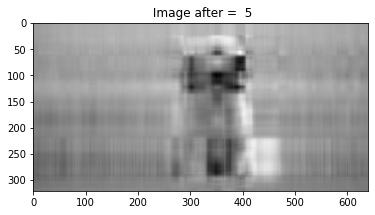

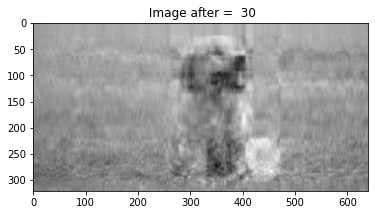

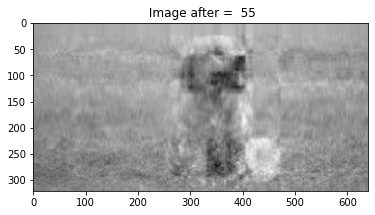

In [ ]:
for i in range(5,76,25):
    cmp_img = np.dot(U[:,:i],(np.dot(S[:i,:i],V[:,:i].transpose())))
    plt.imshow(cmp_img, cmap = 'gray')
    title = " Image after =  %s" %i
    plt.title(title)
    plt.show()

The quality increases as we increase the total number of components or singluar values but the resolution or quality is still less than the original grayscale image i.e. the image has been compressed.